In [20]:
# pip install xgboost

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 한글깨질 경우
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [2]:
train = pd.read_csv("./open-2/train.csv")
test = pd.read_csv("./open-2/test.csv")

In [3]:
전체 = pd.concat([train, test], axis=0)

In [74]:
full = pd.concat( [train, test], axis=0 )
pd.DataFrame( full.isnull().sum() ).T

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,0,0,0,0,971,279,18,0,18,20,0,871,0,0,0,0,613


In [76]:
# 전처리
# 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수
full['전용면적'] = full['전용면적'].fillna(full['전용면적'].mean())
full['해당층'] = full['해당층'].fillna(full['해당층'].mode()[0])
full['총층'] =full['총층'].fillna(full['총층'].mode()[0])
full['방수'] = full['방수'].fillna(full['방수'].mode()[0])
full['욕실수'] = full['욕실수'].fillna(full['욕실수'].mode()[0])
full['총주차대수'] = full['총주차대수'].fillna(full['총주차대수'].mean())

In [77]:
# 결측치 다시 확인
pd.DataFrame( full.isnull().sum() ).T

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,613


### 1번 방식의 전처리

In [90]:
full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full['전용면적'] = full['전용면적'].fillna(full['전용면적'].mean())
full['해당층'] = full['해당층'].fillna(full['해당층'].mode()[0])
full['총층'] =full['총층'].fillna(full['총층'].mode()[0])
full['방수'] = full['방수'].fillna(full['방수'].mode()[0])
full['욕실수'] = full['욕실수'].fillna(full['욕실수'].mode()[0])
full['총주차대수'] = full['총주차대수'].fillna(full['총주차대수'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','게재일','ID'], axis=1)

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','방향','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 2번 방식의 전처리

In [ ]:
full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','게재일','ID'], axis=1)

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','방향','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 3번 방식의 전처리

In [118]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','게재일','ID'], axis=1)

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 4번 방식의 전처리

In [11]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

In [206]:
print(트레인.shape, 테스트.shape)

(2452, 17) (613, 16)


### 5번 방식의 전처리

In [160]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가 (년, 월 추가)
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']


# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 6번 방식의 전처리

In [172]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가 (년, 월 추가)
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])


# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 7번 방식의 전처리 (전용면적 결측치를 0이아닌 가격 그룹별 평균으로 채워넣기)

In [199]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 ( 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 ( 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수','총주차대수']] = full[['해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가 (년, 월 추가)
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 8번 방식의 전처리 (4번에대 면적을 결측치를 구간별로 사용)

In [211]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수','총주차대수']] = full[['해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

In [212]:
트레인.shape, 테스트.shape

((2452, 17), (613, 16))

### 9번 방식의 전처리 (8번 방식에서 총주차대수 0으로 결측치 처리한거 가격등급별 median처리로 바꾸기)

In [4]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수']] = full[['해당층','방수','욕실수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))
full['총주차대수'] = full.groupby('가격등급')['총주차대수'].transform(lambda x:x.fillna(x.median()))

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 10번 방식의 전처리 (8번 방식에 데이터 스케일링 추가)

In [17]:
scaler = StandardScaler()
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수','총주차대수']] = full[['해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)

# standard scaler 적용
cols = ['보증금','월세','관리비']
full_dropped[cols] = scaler.fit_transform(full_dropped[cols])

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 11번 방식의 전처리 (9번 방식에 스케일링 추가)

In [22]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수']] = full[['해당층','방수','욕실수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))
full['총주차대수'] = full.groupby('가격등급')['총주차대수'].transform(lambda x:x.fillna(x.median()))

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)

# standard scaler 적용
cols = ['보증금','월세','관리비']
full_dropped[cols] = scaler.fit_transform(full_dropped[cols])

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소','전용면적']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 12번 방식의 전처리 (관리비가 10,000 -> 1 이렇게 표현돼 있었음 이를 정정하여 다시 처리)

In [27]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수']] = full[['해당층','방수','욕실수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month
# 설명변수 추가 (전세가로 환산 5%로 계산)
환율 = (5/100)
full['월유지비'] = (full['보증금'] * 환율) + full['월세'] + (full['관리비'] * 10000)
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))
full['총주차대수'] = full.groupby('가격등급')['총주차대수'].transform(lambda x:x.fillna(x.median()))

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)

# standard scaler 적용
cols = ['보증금','월세','관리비']
full_dropped[cols] = scaler.fit_transform(full_dropped[cols])

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소','전용면적']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 13번 방식의 전처리 (월 유지비 계산 없이 계산 요소들을 모두 민맥스스케일링 진행)

In [38]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수']] = full[['해당층','방수','욕실수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month


# 설명변수 추가 (전세가로 환산 5%로 계산)
scaler = MinMaxScaler()
cols = ['보증금','월세','관리비']
full[cols] = scaler.fit_transform(full[cols])
full['월유지비'] = full['보증금'] + full['월세']  + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))
full['총주차대수'] = full.groupby('가격등급')['총주차대수'].transform(lambda x:x.fillna(x.median()))

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소','전용면적']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

In [34]:
트레인.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일,허위매물여부,게재년,게재월
0,2,0.874587,0.626667,327,0.0,15.0,4,1.0,1.0,0,40.0,1.000000,256,1.728432e+09,0.0,2024,10
1,2,0.364136,0.266667,314,3.0,4.0,7,2.0,1.0,1,10.0,0.000000,240,1.735171e+09,0.0,2024,12
2,1,0.239824,0.506667,370,2.0,3.0,0,1.0,1.0,1,8.0,0.000000,157,1.732752e+09,0.0,2024,11
3,2,0.348735,0.040000,791,3.0,9.0,7,2.0,1.0,0,13.0,0.104167,32,1.732579e+09,0.0,2024,11
4,2,0.750275,0.706667,327,3.0,3.0,0,2.0,1.0,1,8.0,0.000000,76,1.719274e+09,1.0,2024,6


### 14번 방식의 전처리 (13번에서 전용면적을 standard sclaling)

In [48]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수']] = full[['해당층','방수','욕실수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month


# 설명변수 추가 (전세가로 환산 5%로 계산)
scaler = MinMaxScaler()
cols = ['보증금','월세','관리비']
full[cols] = scaler.fit_transform(full[cols])
full['월유지비'] = full['보증금'] + full['월세']  + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))
full['총주차대수'] = full.groupby('가격등급')['총주차대수'].transform(lambda x:x.fillna(x.median()))

# 전처리(Standard Scaling 전용며적)
st_scaler = StandardScaler()
full['전용면적'] = st_scaler.fit_transform(full[['전용면적']])

# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소','전용면적']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 15번 방식의 전처리 (민맥스스케일링에 전용면적 추가)

In [51]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['해당층','방수','욕실수']] = full[['해당층','방수','욕실수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month


# 설명변수 추가 (전세가로 환산 5%로 계산)
scaler = MinMaxScaler()
cols = ['보증금','월세','관리비', '전용면적']
full[cols] = scaler.fit_transform(full[cols])
full['월유지비'] = full['보증금'] + full['월세']  + full['관리비']
full['가격등급'] = pd.qcut(full['월유지비'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# 전처리 ( 결측치 전용면적은 가격 그룹별 평균으로 )
full['전용면적'] = full.groupby('가격등급')['전용면적'].transform(lambda x:x.fillna(x.median()))
full['총주차대수'] = full.groupby('가격등급')['총주차대수'].transform(lambda x:x.fillna(x.median()))


# 가격등급 월 유지비 삭제
full = full.drop(['월유지비','가격등급'], axis=1)

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소','전용면적']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

## 전처리 후 여기부터 시작

In [39]:
# 데이터 나누기
x = 트레인.drop(['허위매물여부'], axis=1)
y = 트레인['허위매물여부']

### 랜덤포레스트 사용

In [220]:
# 전처리 끝났으니 데이터 학습 및 점수확인
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

# (1차 마무리단계)최적모델 찾기
# 평가할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],  # 트리 개수
    'max_depth': [None, 5, 10, 15, 20, 25, 30],  # 트리 최대 깊이
    'min_samples_split': [2, 3, 4, 5, 7, 10],  # 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4, 4]     # 리프 노드의 최소 샘플 수
}
# 그리드 서치 객체 생성 (교차 검증 5번 진행)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1_macro')

# 그리드 서치를 이용한 학습
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

# 점수확인
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       428
         1.0       0.88      0.78      0.82        63

    accuracy                           0.96       491
   macro avg       0.92      0.88      0.90       491
weighted avg       0.96      0.96      0.96       491

0.8995978460909277


### xgboost사용

In [36]:
# 하이퍼파라미터 탐색 공간
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# 데이터 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델과 파라미터를 GridSearchCV에 전달
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1)

# 훈련
grid_search.fit(x_train, y_train)

# 최적 파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

# 점수확인
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       428
         1.0       0.96      0.79      0.87        63

    accuracy                           0.97       491
   macro avg       0.97      0.89      0.93       491
weighted avg       0.97      0.97      0.97       491

0.9261320896645103


#### XGBoost (그리드 서칭 세부화)

In [44]:
# 하이퍼파라미터 탐색 공간
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 75, 100, 150, 200],
}

# 데이터 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델과 파라미터를 GridSearchCV에 전달
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1)

# 훈련
grid_search.fit(x_train, y_train)

# 최적 파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

# 점수확인
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       428
         1.0       0.94      0.78      0.85        63

    accuracy                           0.97       491
   macro avg       0.96      0.89      0.92       491
weighted avg       0.96      0.97      0.96       491

0.9162830349531116


#### xgb min chile weight 파람추가

In [52]:
# 하이퍼파라미터 탐색 공간
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 75, 100, 150, 200],
    'min_child_weight':[1,  3,  5, ],
}

# 데이터 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델과 파라미터를 GridSearchCV에 전달
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1)

# 훈련
grid_search.fit(x_train, y_train)

# 최적 파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

# 점수확인
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       428
         1.0       0.94      0.78      0.85        63

    accuracy                           0.97       491
   macro avg       0.96      0.89      0.92       491
weighted avg       0.96      0.97      0.96       491

0.9162830349531116


### 딥러닝 모델

In [ ]:
# 딥러닝은 안맞는거같다
# 하지 말 것
import torch
import torch.nn as nn
import torch.optim as optim


# 데이터셋 준비
x = 트레인.drop(['허위매물여부'], axis=1)
y = 트레인['허위매물여부']

# 데이터 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


# PyTorch 텐서로 변환
X = torch.tensor(x_train.to_numpy(), dtype=torch.float32)
y = torch.tensor(y_train.to_numpy(), dtype=torch.long)

# 다층 퍼셉트론 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(x.shape[1], 64)  # 입력 특성 10개 -> 은닉층 64개
        self.fc2 = nn.Linear(64, 32)  # 은닉층 64개 -> 은닉층 32개
        self.fc3 = nn.Linear(32, 2)   # 은닉층 32개 -> 출력 2개 (클래스)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 활성화 함수로 ReLU 사용
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = MLP()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제에서 CrossEntropy 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 훈련 과정
epochs = 5
for epoch in range(epochs):
    model.train()
    
    # 순전파
    outputs = model(X)
    loss = criterion(outputs, y)

    # 역전파
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 가중치 업데이트

    if (epoch + 1) % 2 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
        
# 예측을 위한 데이터 (X_test 예시로 사용)
x_val = torch.tensor(x_val.to_numpy(), dtype=torch.float32)  # X_test는 예측할 데이터
with torch.no_grad():  # 그래디언트 추적을 끄기
    outputs = model(x_val)  # 모델에 입력

# 모델의 출력은 로짓 값이므로, 이를 클래스 레이블로 변환
_, predicted = torch.max(outputs, 1)  # 가장 큰 값의 인덱스를 선택

# 예측된 결과를 DataFrame이나 다른 형태로 저장할 수 있어
y_pred = predicted.numpy()  # 예측 결과를 넘파이 배열로 변환

# 점수확인
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

### 기록

In [ ]:
# 1번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
#               precision    recall  f1-score   support

#          0.0       0.93      0.98      0.96       428
#          1.0       0.82      0.49      0.61        63

#     accuracy                           0.92       491
#    macro avg       0.87      0.74      0.78       491
# weighted avg       0.91      0.92      0.91       491

# 0.784796754363291

# 2번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
#               precision    recall  f1-score   support

#          0.0       0.93      0.98      0.96       428
#          1.0       0.82      0.52      0.64        63

#     accuracy                           0.92       491
#    macro avg       0.88      0.75      0.80       491
# weighted avg       0.92      0.92      0.92       491

# 0.799341705601025

# 3번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
#               precision    recall  f1-score   support

#          0.0       0.92      0.98      0.95       428
#          1.0       0.80      0.44      0.57        63

#     accuracy                           0.91       491
#    macro avg       0.86      0.71      0.76       491
# weighted avg       0.91      0.91      0.90       491

# 0.7619586296056884

# 4번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 175}
#               precision    recall  f1-score   support

#          0.0       0.97      0.98      0.97       428
#          1.0       0.86      0.76      0.81        63

#     accuracy                           0.95       491
#    macro avg       0.91      0.87      0.89       491
# weighted avg       0.95      0.95      0.95       491

# 0.8900357361948255

# 5번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
#               precision    recall  f1-score   support

#          0.0       0.96      0.98      0.97       428
#          1.0       0.84      0.75      0.79        63

#     accuracy                           0.95       491
#    macro avg       0.90      0.86      0.88       491
# weighted avg       0.95      0.95      0.95       491

# 0.8804736262987234

# 6번 


# 7번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
#               precision    recall  f1-score   support

#          0.0       0.96      0.98      0.97       428
#          1.0       0.82      0.75      0.78        63

#     accuracy                           0.95       491
#    macro avg       0.89      0.86      0.88       491
# weighted avg       0.95      0.95      0.95       491

# 0.876585460170147

# 8번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
#               precision    recall  f1-score   support

#          0.0       0.97      0.98      0.97       428
#          1.0       0.87      0.76      0.81        63

#     accuracy                           0.96       491
#    macro avg       0.92      0.87      0.89       491
# weighted avg       0.95      0.96      0.95       491

# 0.8940481795354677

# 9번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
#               precision    recall  f1-score   support

#          0.0       0.97      0.98      0.98       428
#          1.0       0.88      0.78      0.82        63

#     accuracy                           0.96       491
#    macro avg       0.92      0.88      0.90       491
# weighted avg       0.96      0.96      0.96       491

# 0.8995978460909277

# 9번 + xgb
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
#               precision    recall  f1-score   support

#          0.0       0.98      0.99      0.98       428
#          1.0       0.90      0.86      0.88        63

#     accuracy                           0.97       491
#    macro avg       0.94      0.92      0.93       491
# weighted avg       0.97      0.97      0.97       491

# 0.9302933075896533

# 4번 + xgb
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
#               precision    recall  f1-score   support

#          0.0       0.97      0.99      0.98       428
#          1.0       0.91      0.83      0.87        63

#     accuracy                           0.97       491
#    macro avg       0.94      0.91      0.92       491
# weighted avg       0.97      0.97      0.97       491

# 0.9240525908739365

# 10번 + xgb
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
#               precision    recall  f1-score   support

#          0.0       0.98      0.99      0.98       428
#          1.0       0.91      0.84      0.88        63

#     accuracy                           0.97       491
#    macro avg       0.95      0.91      0.93       491
# weighted avg       0.97      0.97      0.97       491

# 0.9293057275318917

# 11번 + xgb   (스케일링 하나마나 소용없어보임)
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
#               precision    recall  f1-score   support

#          0.0       0.98      0.99      0.98       428
#          1.0       0.90      0.86      0.88        63

#     accuracy                           0.97       491
#    macro avg       0.94      0.92      0.93       491
# weighted avg       0.97      0.97      0.97       491

# 0.9302933075896533

# 12번 + xgb
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
#               precision    recall  f1-score   support

#          0.0       0.98      0.99      0.98       428
#          1.0       0.91      0.84      0.88        63

#     accuracy                           0.97       491
#    macro avg       0.95      0.91      0.93       491
# weighted avg       0.97      0.97      0.97       491

# 0.9293057275318917

# 13번 + xgb
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
#               precision    recall  f1-score   support

#          0.0       0.97      1.00      0.98       428
#          1.0       0.96      0.79      0.87        63

#     accuracy                           0.97       491
#    macro avg       0.97      0.89      0.93       491
# weighted avg       0.97      0.97      0.97       491

# 0.9261320896645103

# 13번 + xgb세부화
# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best Parameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150}
#               precision    recall  f1-score   support

#          0.0       0.98      0.99      0.98       428
#          1.0       0.91      0.84      0.88        63

#     accuracy                           0.97       491
#    macro avg       0.95      0.91      0.93       491
# weighted avg       0.97      0.97      0.97       491

# 0.9293057275318917


# 13번 + xgb minchile파람 조정
# Fitting 5 folds for each of 200 candidates, totalling 1000 fits
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50}
#               precision    recall  f1-score   support

#          0.0       0.97      0.99      0.98       428
#          1.0       0.94      0.78      0.85        63

#     accuracy                           0.97       491
#    macro avg       0.96      0.89      0.92       491
# weighted avg       0.96      0.97      0.96       491

# 0.9162830349531116

# 14번 + xgb minchile파람 조정   -> 차이 없음
# Fitting 5 folds for each of 200 candidates, totalling 1000 fits
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50}
#               precision    recall  f1-score   support

#          0.0       0.97      0.99      0.98       428
#          1.0       0.94      0.78      0.85        63

#     accuracy                           0.97       491
#    macro avg       0.96      0.89      0.92       491
# weighted avg       0.96      0.97      0.96       491

# 0.9162830349531116

# 15번 + sgb minchile
# Fitting 5 folds for each of 300 candidates, totalling 1500 fits
# Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50}
#               precision    recall  f1-score   support

#          0.0       0.97      0.99      0.98       428
#          1.0       0.94      0.78      0.85        63

#     accuracy                           0.97       491
#    macro avg       0.96      0.89      0.92       491
# weighted avg       0.96      0.97      0.96       491

# 0.9162830349531116

# ---------------------------------------------------------------------------------------------
# 설명변수 추가가 아니면 모델 성능차이 없을 듯



### 괜찮은 모델 제출해보기

In [45]:
# answer 만들기
for_id = pd.read_csv("./open-2/test.csv")
imsi = best_model.predict(테스트)
imsi = pd.DataFrame(imsi, columns=['허위매물여부'])
answer = pd.concat([for_id[['ID']], imsi], axis=1)
answer.to_csv('25012402.csv', index=False, encoding='utf-8-sig')

100등() -> 64등(0.8429516423) -> 63등(0.84715) -> 64등(0.8471528472, 25012307파일) -> 42등(0.8575379981, 25012402파일)

In [129]:
# 컬럼확인
full.head(3)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,게재년,게재월
0,TRAIN_0000,현장확인,402500000.0,470000,0.0,0.0,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,1.728432e+09,0.0,2024,10
1,TRAIN_0001,현장확인,170500000.0,200000,0.0,3.0,4.0,남동향,2.0,1.0,불가능,0.0,0,q39iV5J4E6,D플랫폼,1.735171e+09,0.0,2024,12
2,TRAIN_0002,전화확인,114000000.0,380000,0.0,2.0,3.0,동향,1.0,1.0,불가능,0.0,0,b03oE4G3F6,A플랫폼,1.732752e+09,0.0,2024,11


In [196]:
# 데이터 확인
display(train.groupby(['총층'])['전용면적'].describe())
display(train.groupby(['총층'])['총주차대수'].describe())

,count,mean,std,min,25%,50%,75%,max
총층,,,,,,,,
2.0,38.0,27.715263,7.631306,17.5,20.5600,27.405,32.6825,44.29
3.0,129.0,29.866977,8.094055,17.5,23.1400,29.500,35.7100,48.95
4.0,106.0,26.740472,8.559897,17.5,19.8075,25.105,31.6700,49.60
5.0,122.0,28.784016,9.088494,17.5,21.2650,27.530,35.3800,49.60
6.0,222.0,28.712838,9.142776,17.5,19.8300,28.650,37.5225,49.97
7.0,166.0,26.438976,6.759603,17.5,19.8500,26.250,29.9200,43.54
8.0,105.0,26.331238,7.560575,17.5,19.8100,25.560,31.1300,42.97
9.0,119.0,27.856134,7.134012,17.5,22.2250,29.360,32.9150,41.65
10.0,95.0,26.174211,6.091498,17.5,24.0100,25.560,29.7650,44.33


,count,mean,std,min,25%,50%,75%,max
총층,,,,,,,,
2.0,37.0,21.459459,13.659743,1.0,10.00,18.0,33.00,45.0
3.0,77.0,12.155844,15.160601,1.0,1.00,2.0,22.00,45.0
4.0,151.0,9.298013,14.508294,1.0,1.00,2.0,5.00,49.0
5.0,171.0,12.058480,45.965551,1.0,2.00,5.0,7.00,590.0
6.0,247.0,10.469636,11.807315,1.0,4.00,6.0,11.00,50.0
7.0,170.0,10.964706,11.906884,1.0,4.00,6.0,14.50,50.0
8.0,115.0,11.391304,13.705355,1.0,4.00,6.0,8.50,50.0
9.0,124.0,22.677419,40.108704,1.0,7.00,10.0,28.00,260.0
10.0,99.0,21.373737,14.369459,1.0,8.00,18.0,34.00,50.0


<Axes: xlabel='총층', ylabel='전용면적'>

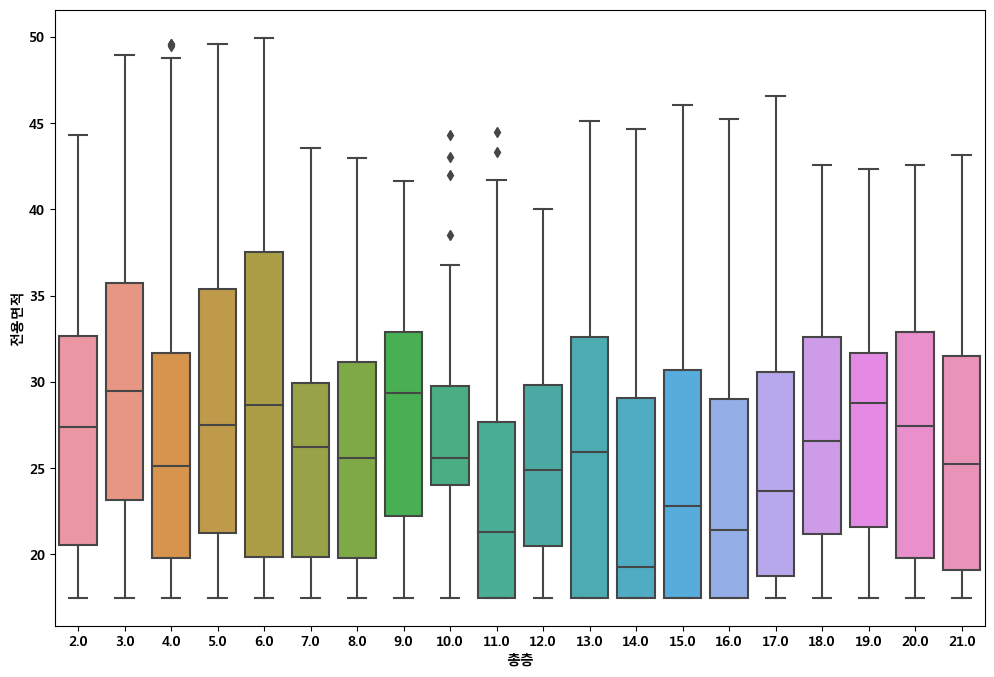

In [141]:
plt.figure(figsize=(12,8))
sns.boxplot(data = train, x='총층', y='전용면적')

In [145]:
# 보증금이 높으면 월세가 낮음, 보증금이 낮으면 월세가 높음 
# 이를 이용해서 등급을 매기고 등급에 따른 전용면적 차이를 알아보자
# 보증금과 월세를 등급을 매기고 그에 따른 합산 등급을 또 만든다. -> 이러한 설명변수를 추가해보자


In [197]:
# 가격에 등급을 메기고 등급당 면적에 차이가 있는지 확인 -> 가격과 면적은 관련 없어 보임
트레인_면적 = 트레인[트레인['전용면적'] > 0]
display(트레인.groupby('가격등급')['전용면적'].describe())
display(트레인)

,count,mean,std,min,25%,50%,75%,max
가격등급,,,,,,,,
1,281.0,27.129680,6.543000,17.5,23.1400,27.065,29.7800,48.95
2,250.0,27.484880,6.629282,17.5,24.1475,27.240,29.5600,49.60
3,197.0,25.898071,5.753253,17.5,23.0900,25.850,27.3600,46.03
4,258.0,26.973140,6.184403,17.5,23.0000,27.430,28.9475,46.35
5,254.0,27.395197,6.459388,17.5,23.2025,27.190,29.8125,48.60
6,244.0,27.399631,6.930230,17.5,21.2875,28.090,29.9800,49.97
7,254.0,27.066457,6.674297,17.5,22.8025,26.420,29.9200,48.95
8,186.0,26.180323,5.796330,17.5,23.6175,25.800,27.3425,46.35
9,269.0,26.445242,7.428957,17.5,21.0100,25.290,29.5600,49.60


,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일,허위매물여부,게재년,게재월,월유지비,가격등급
0,2,402500000.0,470000,26.245,0.0,15.0,4,1.0,1.0,0,40.0,96,256,1.728432e+09,0.0,2024,10,20595096.0,10
1,2,170500000.0,200000,26.420,3.0,4.0,7,2.0,1.0,1,0.0,0,240,1.735171e+09,0.0,2024,12,8725000.0,7
2,1,114000000.0,380000,27.190,2.0,3.0,0,1.0,1.0,1,0.0,0,157,1.732752e+09,0.0,2024,11,6080000.0,5
3,2,163500000.0,30000,36.300,3.0,9.0,7,2.0,1.0,0,13.0,10,32,1.732579e+09,0.0,2024,11,8205010.0,7
4,2,346000000.0,530000,25.290,3.0,3.0,0,2.0,1.0,1,0.0,0,76,1.719274e+09,1.0,2024,6,17830000.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,159000000.0,550000,48.950,3.0,3.0,6,2.0,1.0,1,0.0,0,170,1.731715e+09,0.0,2024,11,8500000.0,7
2448,0,158500000.0,750000,26.420,2.0,4.0,6,1.0,1.0,1,0.0,2,184,1.728173e+09,0.0,2024,10,8675002.0,7
2449,1,329000000.0,610000,17.500,8.0,20.0,5,1.0,1.0,0,29.0,10,32,1.715731e+09,0.0,2024,5,17060010.0,9
2450,2,31000000.0,400000,22.870,8.0,9.0,7,2.0,1.0,0,0.0,8,218,1.722902e+09,0.0,2024,8,1950008.0,2


/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_6322/14536730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(트레인.corr(), cmap='Blues', fmt = '.2f', annot=True)
/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_6322/14536730.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(트레인_면적.corr(), cmap='Blues', fmt = '.2f', annot=True)


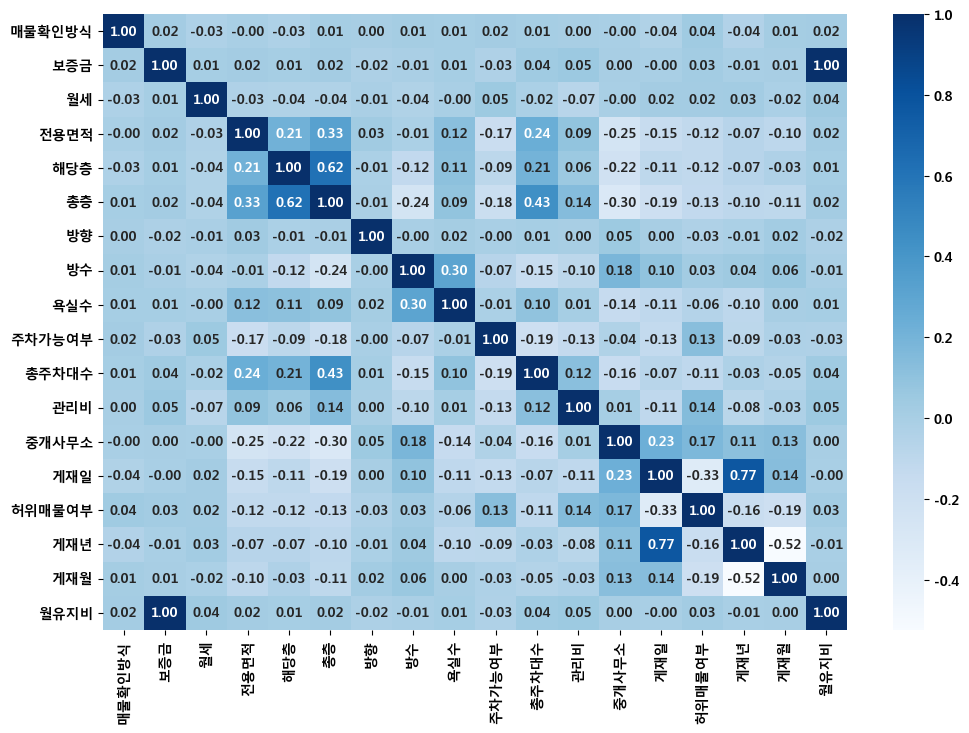

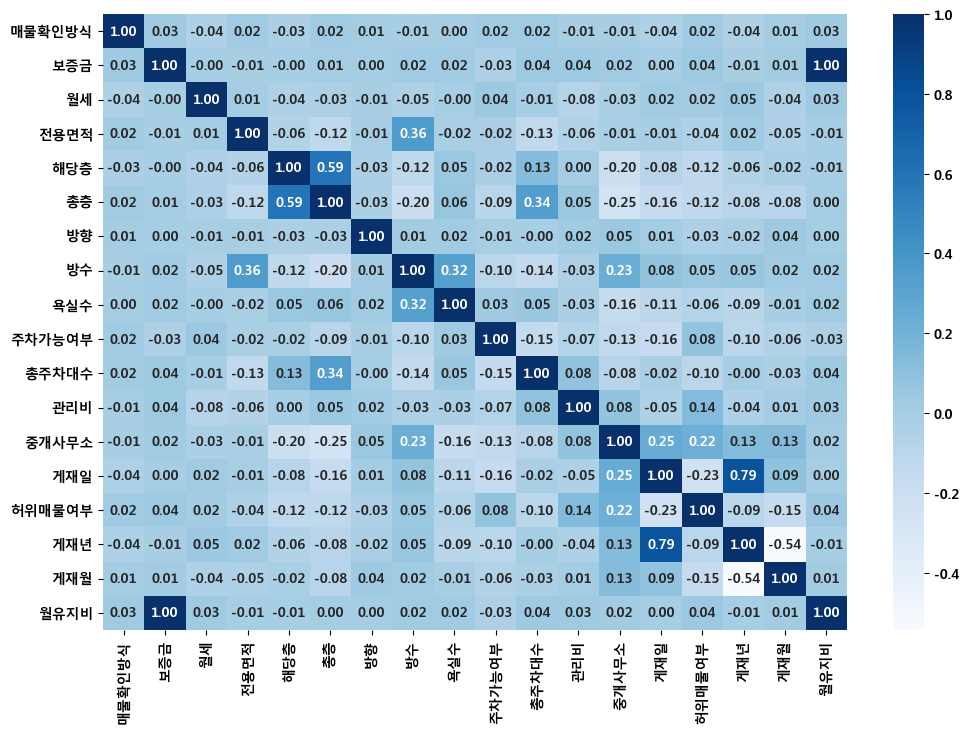

In [177]:
plt.figure(figsize=(12,8))
sns.heatmap(트레인.corr(), cmap='Blues', fmt = '.2f', annot=True)

plt.figure(figsize=(12,8))
sns.heatmap(트레인_면적.corr(), cmap='Blues', fmt = '.2f', annot=True)
plt.show()

In [198]:
pd.concat([pd.DataFrame(트레인.corr()['허위매물여부']), pd.DataFrame(트레인_면적.corr()['허위매물여부'])], axis=1).T

/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_6322/1686187576.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([pd.DataFrame(트레인.corr()['허위매물여부']), pd.DataFrame(트레인_면적.corr()['허위매물여부'])], axis=1).T
/var/folders/p_/qrpm_ybn1234ds6_08hw0lrc0000gn/T/ipykernel_6322/1686187576.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([pd.DataFrame(트레인.corr()['허위매물여부']), pd.DataFrame(트레인_면적.corr()['허위매물여부'])], axis=1).T


,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일,허위매물여부,게재년,게재월,월유지비
허위매물여부,0.039112,0.027893,0.021438,-0.033362,-0.117737,-0.125145,-0.033632,0.025201,-0.055694,0.125662,-0.11149,0.144892,0.167134,-0.333084,1.0,-0.162565,-0.192244,0.028597
허위매물여부,0.039112,0.027893,0.021438,-0.033362,-0.117737,-0.125145,-0.033632,0.025201,-0.055694,0.125662,-0.11149,0.144892,0.167134,-0.333084,1.0,-0.162565,-0.192244,0.028597


In [216]:
train.isnull().sum()

ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64

In [26]:
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [46]:
트레인

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일,허위매물여부,게재년,게재월
0,2,0.874587,0.626667,327,0.0,15.0,4,1.0,1.0,0,40.0,1.000000,256,1.728432e+09,0.0,2024,10
1,2,0.364136,0.266667,314,3.0,4.0,7,2.0,1.0,1,10.0,0.000000,240,1.735171e+09,0.0,2024,12
2,1,0.239824,0.506667,370,2.0,3.0,0,1.0,1.0,1,8.0,0.000000,157,1.732752e+09,0.0,2024,11
3,2,0.348735,0.040000,791,3.0,9.0,7,2.0,1.0,0,13.0,0.104167,32,1.732579e+09,0.0,2024,11
4,2,0.750275,0.706667,327,3.0,3.0,0,2.0,1.0,1,8.0,0.000000,76,1.719274e+09,1.0,2024,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,0.338834,0.733333,961,3.0,3.0,6,2.0,1.0,1,8.0,0.000000,170,1.731715e+09,0.0,2024,11
2448,0,0.337734,1.000000,343,2.0,4.0,6,1.0,1.0,1,13.0,0.020833,184,1.728173e+09,0.0,2024,10
2449,1,0.712871,0.813333,0,8.0,20.0,5,1.0,1.0,0,29.0,0.104167,32,1.715731e+09,0.0,2024,5
2450,2,0.057206,0.533333,205,8.0,9.0,7,2.0,1.0,0,8.0,0.083333,218,1.722902e+09,0.0,2024,8
